In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from scTools import input, preprocess, process
#import cello
import os
import anndata as ad
from anndata import AnnData

In [247]:
#Load files
subsample = None
onMac=True

whichTreatment = 2

treatment = ['NonfatVehicle', 'FriedVehicle', 'FriedCRV431', 'FriedLANI', 'FriedCRVLAN']
if onMac:
    pathPrefix='../clusteringResults/'
else:
    pathPrefix = '/media/pmayo/Disc4/scRNA-seq_Gallay2020/clusteringResults/'

adata = (sc.read_h5ad(pathPrefix + treatment[whichTreatment] +'.h5ad'))
adata.uns['log1p']["base"] = None

In [244]:
macroDict={}
coarseDict={}
fineDict={}

for t in treatment:
    coarseDict[t]={}
    fineDict[t]={}
    currentData = sc.read_h5ad(pathPrefix + t +'.h5ad')
    for cellType in currentData.obs['macroClusters']:
        if cellType not in coarseDict[t].keys():
            coarseDict[t][cellType]=0
        coarseDict[t][cellType] += 1
    for cellType in currentData.obs['coarseClusters']:
        if cellType not in coarseDict[t].keys():
            coarseDict[t][cellType]=0
        coarseDict[t][cellType] += 1
    for cellType in currentData.obs['fineClusters']:
        if cellType not in fineDict[t].keys():
            fineDict[t][cellType]=0
        fineDict[t][cellType] += 1
        
                         

In [246]:
cellType = "B Cells"
total=0
allTypes = []
for t in treatment:
    for k in fineDict[t].keys():
        if k not in allTypes:
            allTypes.append(k)
print(allTypes)
df = pd.DataFrame(columns=allTypes, index=treatment)
for t in treatment:
    for cellType in allTypes:
        if cellType in fineDict[t].keys(): 
            #print(fineDict[t][cellType])
            df.loc[t,cellType]=fineDict[t][cellType]
        else:
            df.loc[t,cellType]=0
#print(df.to_csv('SummaryCellTypes.csv'))
print(df)

['B Cells', 'Blood', 'Naive CD4+', 'Neutrophils', 'NK Cells', 'Naive CD8+', 'CTLs', 'Y-Delta T Cells', 'Ccl6++', 'ILC1s', 'pDCs', 'Kupffer Cells', 'cDC2s', 'Monocytes', 'TEM', 'Peri. Macs', 'Trans. Mono', 'cDC1s', 'CV & Cap. Macs', 'Pat. Mono', 'Stmn1++', 'LAMs', 'Stellate Cells', 'Ebf1++', 'Basophils', 'TRegs', 'Cholangiocytes', 'Mig. cDCs', 'Hepatocytes', 'Jchain++', 'Endothelial Cells', 'Cd79a++', 'Mir6236++', 'Trans. Monocytes', 'H2-Ab1++', 'Fibroblasts', 'Th1s', 'NKT Cells']
              B Cells Blood Naive CD4+ Neutrophils NK Cells Naive CD8+ CTLs  \
NonfatVehicle    2850    37        640         121      554        650  229   
FriedVehicle      514     0        213         192      185        370   62   
FriedCRV431       583     0         83         262      184        507  103   
FriedLANI         889     0        306         263      195        265  313   
FriedCRVLAN       896     0        155         217      235        302   88   

              Y-Delta T Cells Ccl6++ ILC

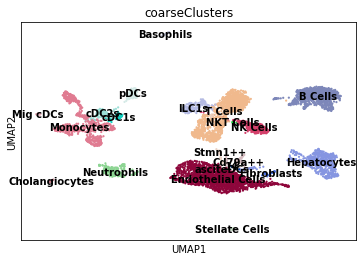

In [197]:
#key='macroClusters'
key='coarseClusters'
sc.pl.umap(adata, color=[key], legend_loc='on data')
#sc.pl.umap(adata, legend_loc='on data', save='_blank_FriedmanVehicle')
#sc.pl.umap(adata, color=['leiden'], legend_loc=None, title='', save='_color_FriedmanVehicle')

In [201]:
LymphoidCells = ['B Cells', 'pDCs', 'NK Cells', 'NKT Cells', 
                 'T Cells', 'T Cells1', 'T Cell2', 'T Cells3', 'y-delta T Cells',
                'ILC1s', 'NK/ILC1s', '6', '8','10', '9', '12']
MyeloidCells = ['cDC1s', 'cDC2s', 'Mig. cDCs', 'Kupffer Cells', 'Monocytes',
               'Monocytes1', 'Monocytes2', 'Monocytes3', 'Monocytes4', 
               'Macrophage/Monocyte', 'Macrophages', 'cDC1s?', 
                'Myeloid Cells']
CD45s = ['Cholangiocytes', 'Hepatocytes', 'Stellate Cells', 'Fibroblasts',
        'Endothelial Cells', 'Endothelial/Fibrotic Cells', 'Cholangiocytes/Fibroblasts',"Endothelial/Stromal Cells", "Fibrotic Cells?"]
custom = ['Endothelial Cells', 'Cholangiocytes','Stellate Cells', 'Hepatocytes','asciteDCs','Fibroblasts','Cd79a++','Stmn1++']

#key='macroClusters'
#for adata in adataList:
#    adata.obs['macroClusters'] = adata.obs['coarseClusters']
#    process.replaceClusters('Myeloid Cells', MyeloidCells, adata, key=key)
#    process.replaceClusters('Lymphoid Cells', LymphoidCells, adata, key=key)
#    process.replaceClusters('CD45s', CD45s, adata, key=key)
#    print(np.unique(adata.obs[key]))


In [202]:
print(np.unique(adata.obs['coarseClusters']))
adata.obs['Lymph'] = [True if x in LymphoidCells else False for x in adata.obs['coarseClusters']]
adata.obs['Myeloid'] = [True if x in MyeloidCells else False for x in adata.obs['coarseClusters']]
adata.obs['CD45'] = [True if x in CD45s else False for x in adata.obs['coarseClusters']]

#lymphAdata = adata[adata.obs['macroClusters']=='Lymphoid Cells']
lymphAdata = adata[adata.obs['coarseClusters'].isin(LymphoidCells)]
#myeloidAdata = adata[adata.obs['macroClusters']=='Myeloid Cells']
myeloidAdata = adata[adata.obs['coarseClusters'].isin(MyeloidCells)]
CD45Adata = adata[adata.obs['coarseClusters'].isin(CD45s)]
customAdata = adata[adata.obs['coarseClusters'].isin(custom)]

fineData = customAdata
print(np.unique(fineData.obs['coarseClusters']))

['14' 'B Cells' 'Basophils' 'Cd79a++' 'Cholangiocytes' 'Endothelial Cells'
 'Fibroblasts' 'Hepatocytes' 'ILC1s' 'Mig cDCs' 'Monocytes' 'NK Cells'
 'NKT Cells' 'Neutrophils' 'Stellate Cells' 'Stmn1++' 'T Cells'
 'asciteDCs' 'cDC1s' 'cDC2s' 'pDCs']
['Cd79a++' 'Cholangiocytes' 'Endothelial Cells' 'Fibroblasts'
 'Hepatocytes' 'Stellate Cells' 'Stmn1++' 'asciteDCs']


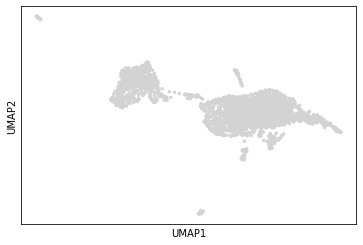

In [204]:

#sc.pp.neighbors(lymphAdata, n_neighbors=15, n_pcs=40)
#sc.tl.umap(lymphAdata)
preprocess.umapify(fineData)

#sc.pl.umap(lymphAdata, color=['leiden'], legend_loc='on data')

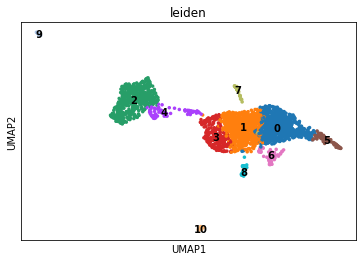

In [205]:
sc.tl.leiden(fineData, resolution=0.5)
sc.pl.umap(fineData, color=['leiden'], legend_loc='on data')
sc.tl.rank_genes_groups(fineData, 'leiden', method='logreg', max_iter=2000)


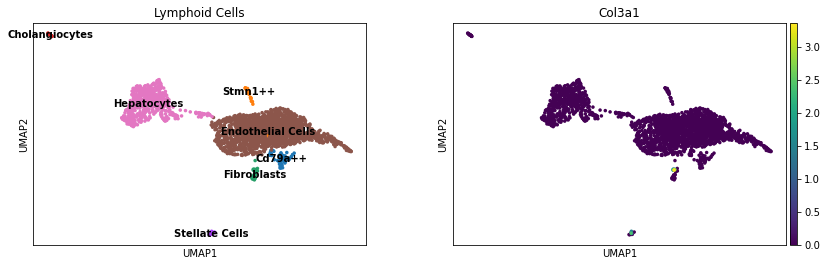

In [222]:
#sc.pl.umap(lymphAdata, color=['leiden'], legend_loc='on data')

#leiden = lymphAdata.obs['leiden'].map({x:('Other' if x=='9' else x) for x in lymphAdata.obs['leiden']})
#lymphAdata.obs['leiden'] = leiden

sc.pl.umap(fineData, color=['leiden', 'Col3a1'], title='Lymphoid Cells', legend_loc='on data')


In [221]:
process.replaceClusters('Cholangiocytes', ['9'], fineData, key='leiden')
#process.replaceClusters('Cd79a++', ['18'], adata, key='coarseClusters')

Cluster 6


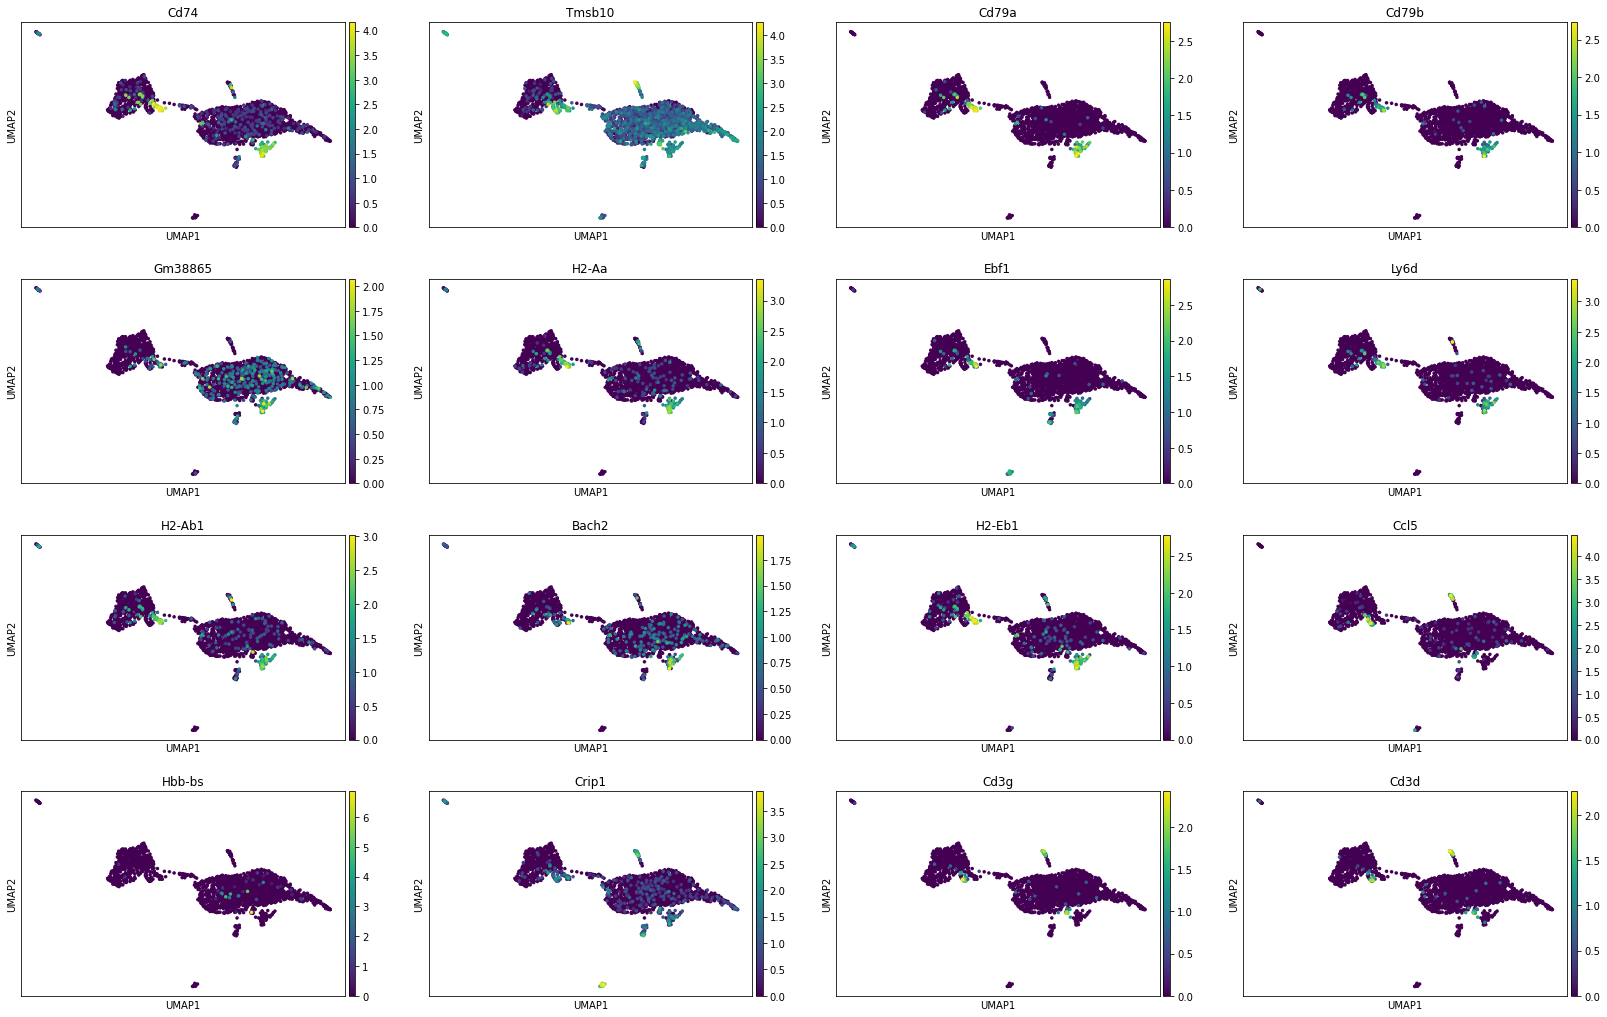

Cluster 7


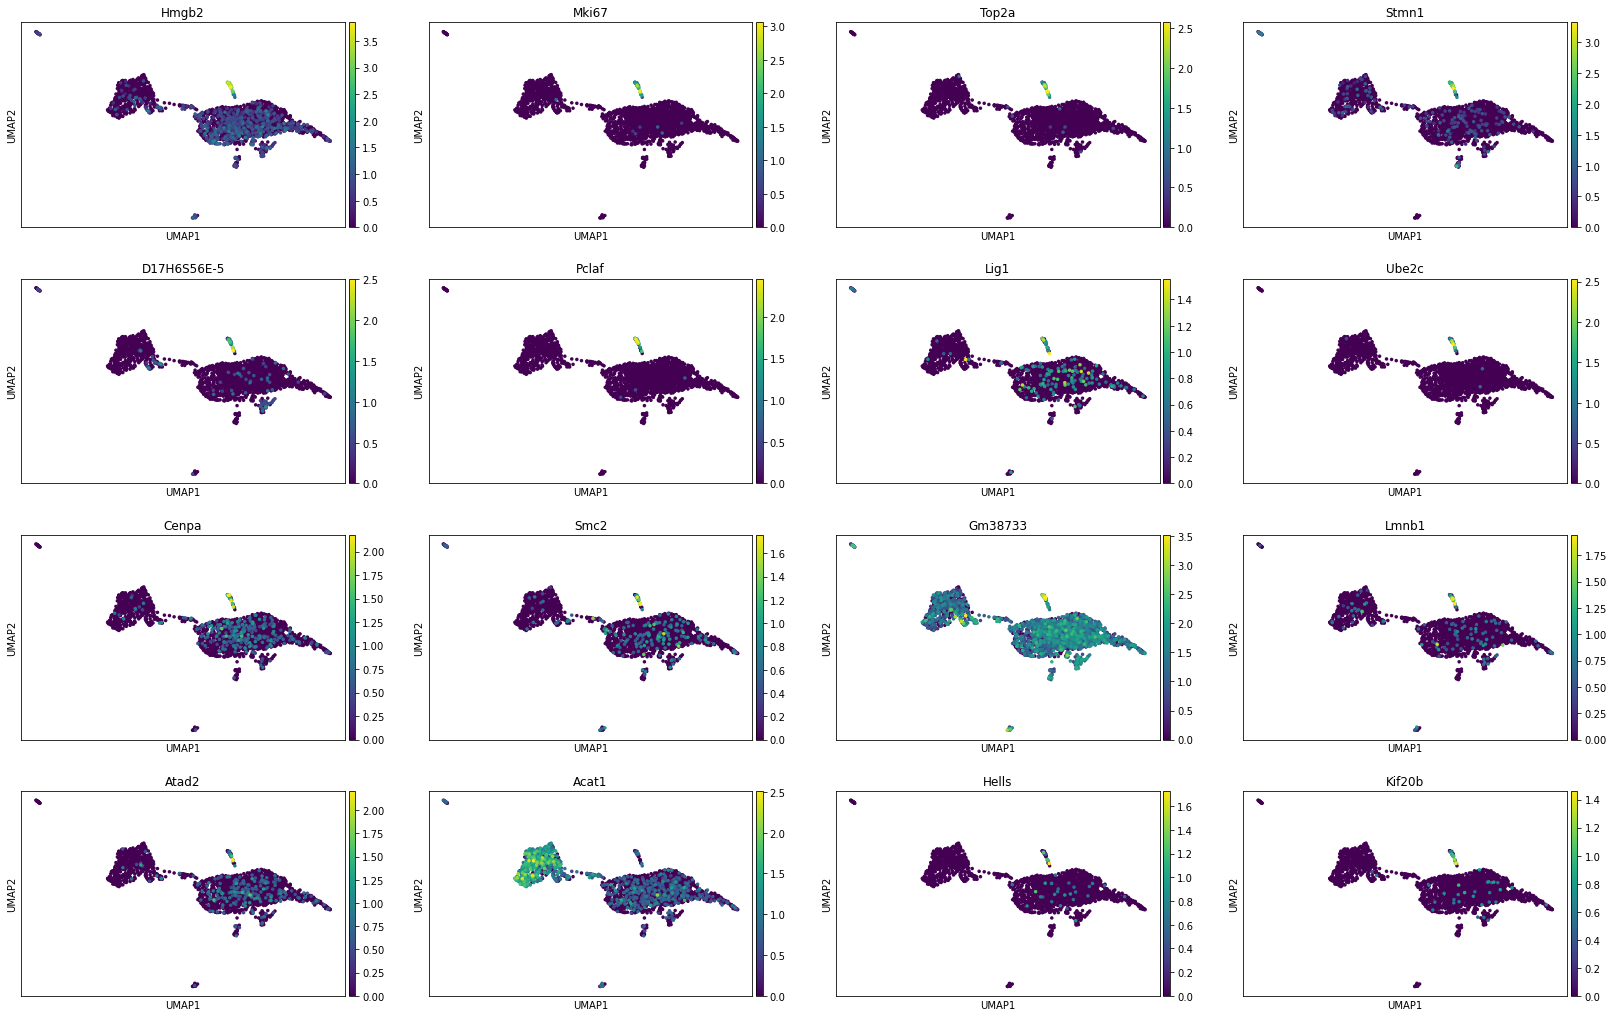

Cluster 8


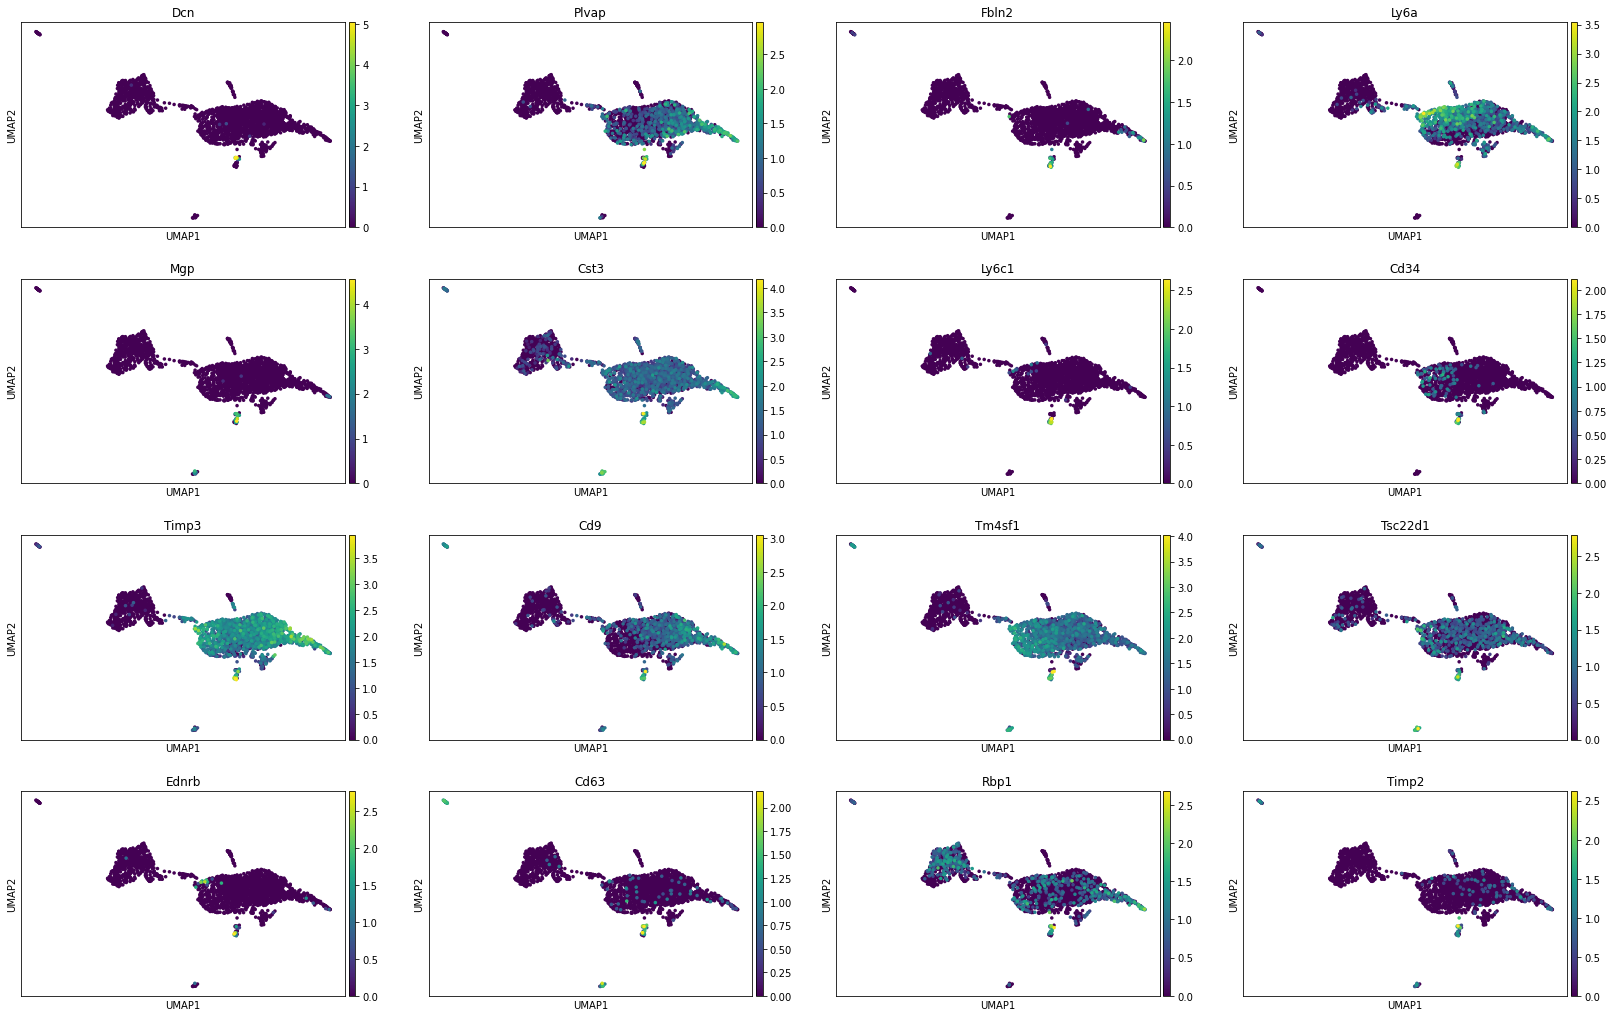

Cluster 9


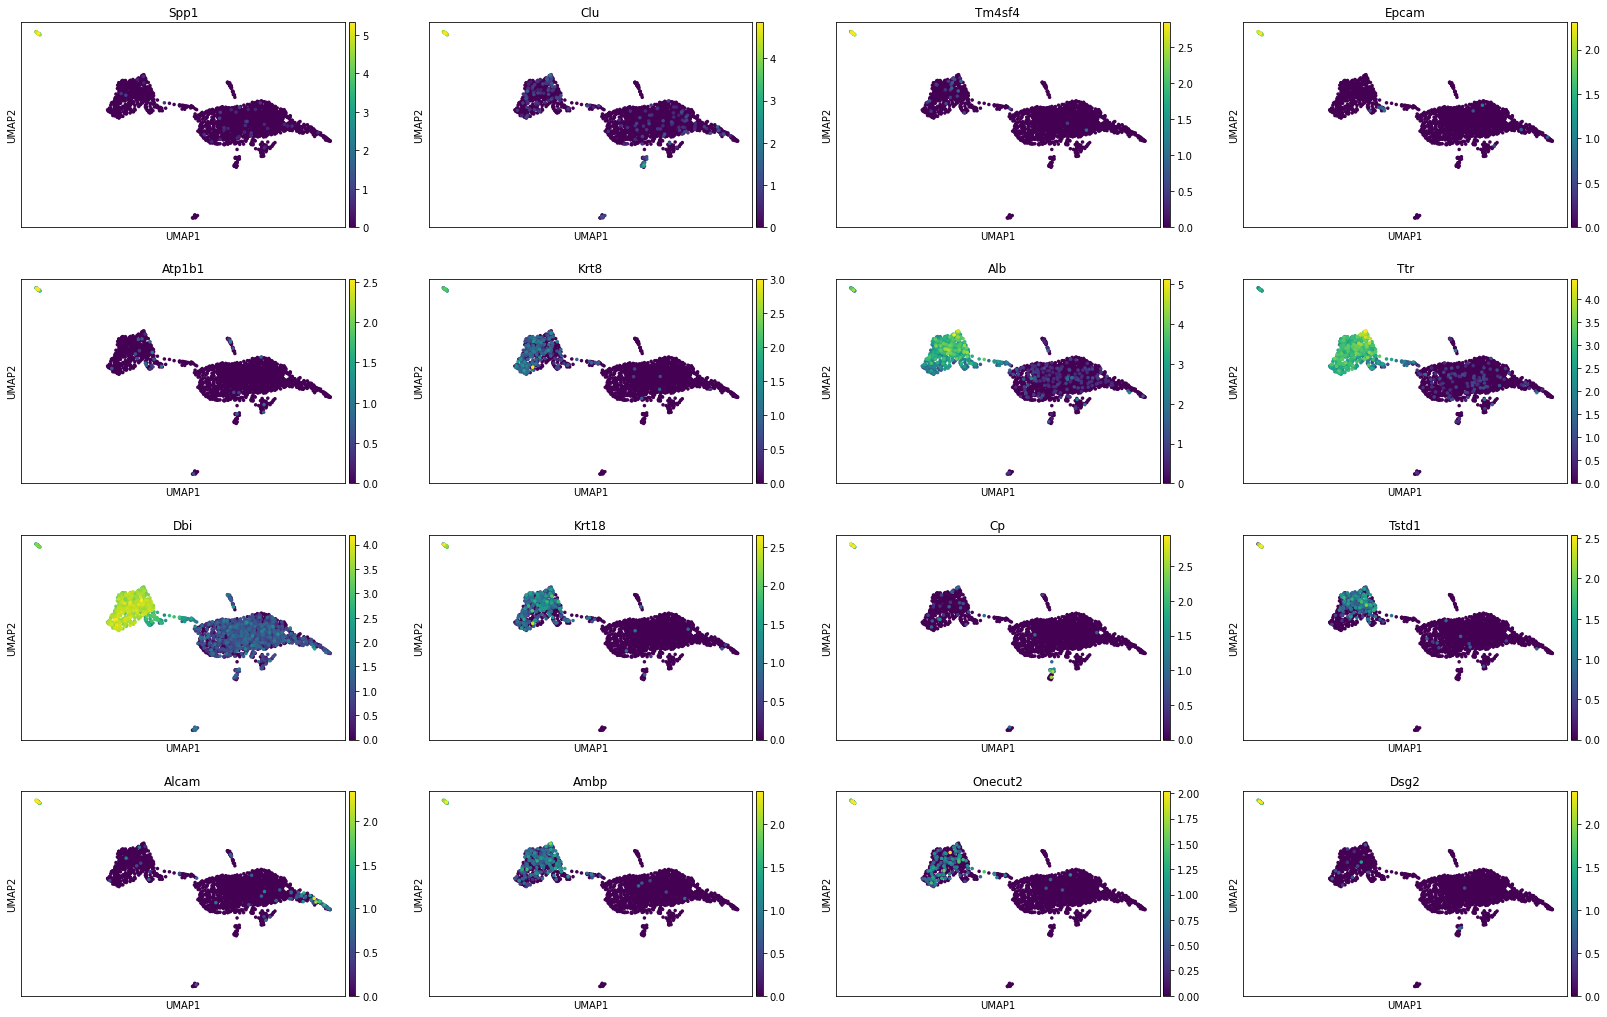

Cluster Endothelial Cells


ValueError: no field of name Endothelial Cells

In [217]:
#print(('fineClusters' not in adata.obs))
for cluster in np.unique(fineData.obs['leiden']):
    print(f"Cluster {cluster}")
    sc.pl.umap(fineData, color=fineData.uns['rank_genes_groups']['names'][str(cluster)][:16])

#newClusterNames = ['B Cells','B Cells2','Naive CD8+','Naive CD4+','CTLs','5','6','Y-Delta T Cells', '8', '9']
#lymphAdata.rename_categories('leiden', newClusterNames)


Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts
Changing Stellate Cells for Fibroblasts


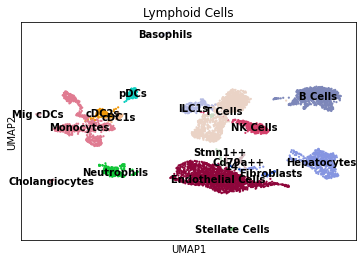

In [238]:
do=True
fineLabelToReplaceCoarse='Fibroblasts'
coarseLabelToGive='Fibroblasts'
key='coarseClusters'

if 'fineClusters' not in adata.obs:
    adata.obs['fineClusters'] = adata.obs['coarseClusters']
if do:
    newFine = process.subClusters(adata, coarseLabel=coarseLabelToGive, fineLabel=fineLabelToReplaceCoarse,
                                  fineData=fineData, coarseKey=key, fineKey='leiden')
    #saver = adata.obs['coarseClusters'].copy()
    adata.obs[key] = newFine
    sc.pl.umap(adata, color=[key], title='Lymphoid Cells', legend_loc='on data')

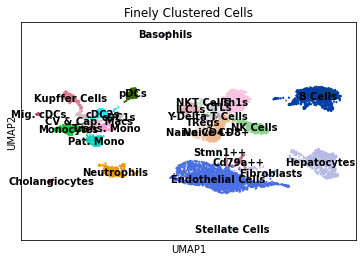

In [235]:
### Add fine-tuning to adata
if 'fineClusters' not in adata.obs:
    adata.obs['fineClusters'] = adata.obs['coarseClusters']
newFineClusters=[]
for cell in adata.obs.index:
    if cell in fineData.obs.index:
        newFineClusters.append(fineData.obs['leiden'][cell])
    else:
        newFineClusters.append(adata.obs['fineClusters'][cell]) 
#print(newFineClusters)
adata.obs['fineClusters']=newFineClusters
sc.pl.umap(adata, color=['fineClusters'], title='Finely Clustered Cells', legend_loc='on data')


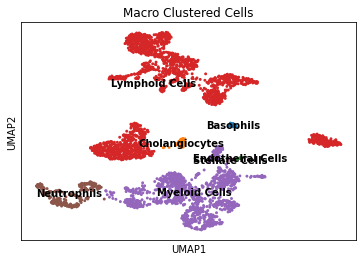

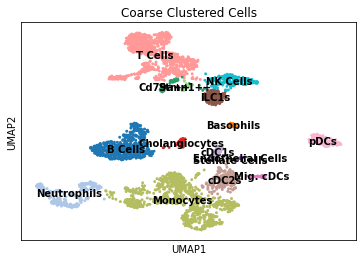

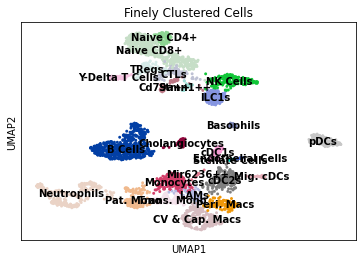

In [249]:
#process.replaceClusters('Endothelial Cells', ['14'], adata, key='coarseClusters')
sc.pl.umap(adata, color=['macroClusters'], title='Macro Clustered Cells', legend_loc='on data')
sc.pl.umap(adata, color=['coarseClusters'], title='Coarse Clustered Cells', legend_loc='on data')
sc.pl.umap(adata, color=['fineClusters'], title='Finely Clustered Cells', legend_loc='on data')


In [243]:
print(f"Saving {pathPrefix + treatment[whichTreatment] +'.h5ad'}")
#adata.write_h5ad('/.h5ad')
adata.write_h5ad(pathPrefix + treatment[whichTreatment] +'.h5ad')

Saving ../clusteringResults/FriedCRVLAN.h5ad
